<a href="https://colab.research.google.com/github/agokmenefe/Data-Science/blob/main/DL/Assignments/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [103]:
df = pd.read_csv("/content/Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum().any()

False

In [7]:
df.duplicated().sum()

0

In [117]:
df = df.drop(["RowNumber","CustomerId","Surname"], axis=1)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [11]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


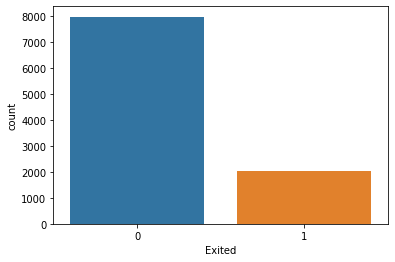

In [12]:
sns.countplot(df["Exited"]);

# Preprocessing of Data
- Train | Test Split, Scalling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [122]:
df = pd.get_dummies(df, drop_first=True)

In [15]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)

In [19]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train.shape

(8000, 11)

In [21]:
X_test.shape

(2000, 11)

# Modelling & Model Performance

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation
from tensorflow.keras.metrics import Accuracy, Recall,Precision
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from tensorflow.keras.optimizers import Adam, SGD,RMSprop
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping

## without class_weigth

### Create The Model

In [23]:
model = Sequential()

model.add(Dense(44, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(22, activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

#opt = Adam(lr = 0.005)
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
# early_stop = EarlyStopping(monitor = "recall", mode = "auto", verbose = 1, patience = 15, restore_best_weights=True)

In [24]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
225/225 [==============================] - 2s 3ms/step - loss: 0.5040 - recall: 0.0115 - val_loss: 0.4480 - val_recall: 0.0000e+00
Epoch 2/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4534 - recall: 0.0325 - val_loss: 0.4294 - val_recall: 0.1645
Epoch 3/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4375 - recall: 0.1746 - val_loss: 0.4154 - val_recall: 0.2566
Epoch 4/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4238 - recall: 0.2382 - val_loss: 0.4077 - val_recall: 0.3618
Epoch 5/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4079 - recall: 0.2848 - val_loss: 0.3891 - val_recall: 0.4079
Epoch 6/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3887 - recall: 0.3390 - val_loss: 0.3557 - val_recall: 0.3553
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3720 - recall: 0.3965 - val_loss: 0.3481 - val_recall: 0.3092
Epoch 8/1000
225

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

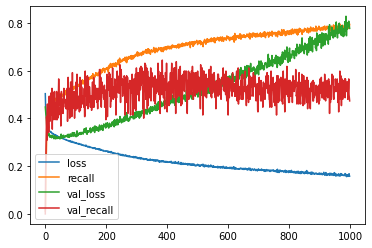

In [26]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [27]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1450  143]
 [ 215  192]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1593
           1       0.57      0.47      0.52       407

    accuracy                           0.82      2000
   macro avg       0.72      0.69      0.70      2000
weighted avg       0.81      0.82      0.81      2000



(0.0, 3000.0)

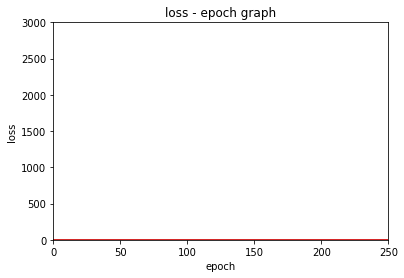

In [28]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

In [29]:
model.evaluate(X_train, y_train, verbose=0)

[0.2179187536239624, 0.7257668972015381]

In [30]:
model.evaluate(X_test, y_test, verbose=0)

[0.8664379119873047, 0.47174447774887085]

In [31]:
y_pred = model.predict(X_test)

In [32]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
4669,1,6.518716e-01
3174,0,6.909954e-10
3535,0,2.165955e-02
9018,0,9.999954e-01
8868,0,3.572131e-01
8807,1,6.090105e-04
149,0,4.027307e-03
2560,1,6.706545e-02
5736,0,3.500206e-17
2779,0,1.431056e-09


## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [33]:
from sklearn.utils import class_weight

In [38]:
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight( 'balanced', classes = np.unique(y_train), 
                y = y_train))) 

In [40]:
model.add(Dense(44, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(22, activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

#opt = Adam(lr = 0.005)
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
# early_stop = EarlyStopping(monitor = "recall", mode = "auto", verbose = 1, patience = 15)

In [41]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1, class_weight = class_weights)

Epoch 1/1000
225/225 [==============================] - 2s 4ms/step - loss: 0.6053 - recall: 0.8505 - val_loss: 0.5414 - val_recall: 0.5000
Epoch 2/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3666 - recall: 0.8363 - val_loss: 0.4706 - val_recall: 0.6184
Epoch 3/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3150 - recall: 0.8687 - val_loss: 0.5543 - val_recall: 0.5921
Epoch 4/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.2853 - recall: 0.8870 - val_loss: 0.5276 - val_recall: 0.5789
Epoch 5/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.2641 - recall: 0.9012 - val_loss: 0.6671 - val_recall: 0.6974
Epoch 6/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.2654 - recall: 0.9019 - val_loss: 0.6058 - val_recall: 0.6645
Epoch 7/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.2616 - recall: 0.8972 - val_loss: 0.4801 - val_recall: 0.5461
Epoch 8/1000
225/225

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

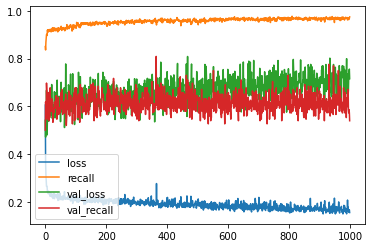

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [51]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1462  131]
 [ 235  172]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1593
           1       0.57      0.42      0.48       407

    accuracy                           0.82      2000
   macro avg       0.71      0.67      0.69      2000
weighted avg       0.80      0.82      0.81      2000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [46]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [49]:
seed = 42

tf.random.set_seed(seed)


model = Sequential()

model.add(Dense(44, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(22, activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [50]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4966 - recall: 0.0210 - val_loss: 0.4315 - val_recall: 0.0592
Epoch 2/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4133 - recall: 0.2930 - val_loss: 0.3510 - val_recall: 0.3750
Epoch 3/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3713 - recall: 0.4032 - val_loss: 0.3426 - val_recall: 0.4013
Epoch 4/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3648 - recall: 0.4012 - val_loss: 0.3348 - val_recall: 0.3618
Epoch 5/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3596 - recall: 0.4235 - val_loss: 0.3353 - val_recall: 0.3487
Epoch 6/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3585 - recall: 0.3917 - val_loss: 0.3277 - val_recall: 0.4145
Epoch 7/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3517 - recall: 0.4364 - val_loss: 0.3274 - val_recall: 0.4145
Epoch 8/1000
225/225

In [53]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", Recall)

loss :  1.3220993280410767
recall :  <class 'keras.metrics.Recall'>


In [54]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1462  131]
 [ 235  172]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1593
           1       0.57      0.42      0.48       407

    accuracy                           0.82      2000
   macro avg       0.71      0.67      0.69      2000
weighted avg       0.80      0.82      0.81      2000



### Add Dropout Layer

In [55]:
from tensorflow.keras.layers import Dropout

In [56]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(44, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(22, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(11, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [57]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.6115 - recall: 0.1346 - val_loss: 0.5018 - val_recall: 0.0000e+00
Epoch 2/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.5373 - recall: 0.0020 - val_loss: 0.4777 - val_recall: 0.0000e+00
Epoch 3/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.5174 - recall: 6.7659e-04 - val_loss: 0.4612 - val_recall: 0.0000e+00
Epoch 4/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.5074 - recall: 0.0000e+00 - val_loss: 0.4585 - val_recall: 0.0000e+00
Epoch 5/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.5011 - recall: 0.0000e+00 - val_loss: 0.4512 - val_recall: 0.0000e+00
Epoch 6/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4953 - recall: 0.0000e+00 - val_loss: 0.4438 - val_recall: 0.0000e+00
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4904 - recall: 6.7659e-04 - val_loss: 0.43

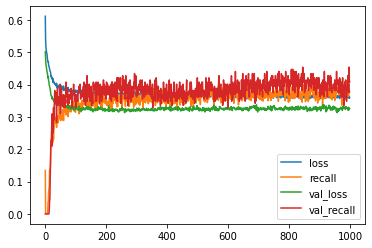

In [58]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [59]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", Recall)

loss :  0.3506900668144226
recall :  <class 'keras.metrics.Recall'>


In [60]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1549   44]
 [ 231  176]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.43      0.56       407

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(44, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(22, activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [63]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [64]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.5670 - recall: 0.0643 - val_loss: 0.4593 - val_recall: 0.0000e+00
Epoch 2/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4638 - recall: 0.0189 - val_loss: 0.4346 - val_recall: 0.0592
Epoch 3/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4425 - recall: 0.1035 - val_loss: 0.4173 - val_recall: 0.1974
Epoch 4/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4215 - recall: 0.2253 - val_loss: 0.4072 - val_recall: 0.1250
Epoch 5/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4030 - recall: 0.2781 - val_loss: 0.3820 - val_recall: 0.2961
Epoch 6/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3867 - recall: 0.3410 - val_loss: 0.3601 - val_recall: 0.4013
Epoch 7/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3723 - recall: 0.4073 - val_loss: 0.3470 - val_recall: 0.3684
Epoch 8/1000
225

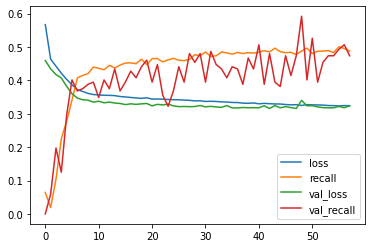

In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [66]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", Recall)

loss :  0.3427543044090271
recall :  <class 'keras.metrics.Recall'>


In [67]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1536   57]
 [ 216  191]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.47      0.58       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



#### Monitor the "val_recall" as metric

In [68]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(44, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(22, activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [69]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [70]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.5670 - recall: 0.0643 - val_loss: 0.4593 - val_recall: 0.0000e+00
Epoch 2/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4638 - recall: 0.0189 - val_loss: 0.4346 - val_recall: 0.0592
Epoch 3/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4425 - recall: 0.1035 - val_loss: 0.4173 - val_recall: 0.1974
Epoch 4/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4215 - recall: 0.2253 - val_loss: 0.4072 - val_recall: 0.1250
Epoch 5/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4030 - recall: 0.2781 - val_loss: 0.3820 - val_recall: 0.2961
Epoch 6/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3867 - recall: 0.3410 - val_loss: 0.3601 - val_recall: 0.4013
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3723 - recall: 0.4073 - val_loss: 0.3470 - val_recall: 0.3684
Epoch 8/1000
225

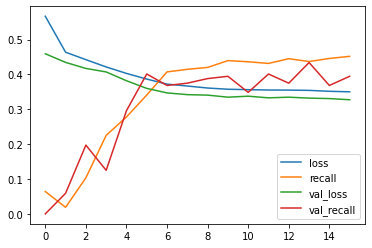

In [71]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [72]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", Recall)

loss :  0.47683629393577576
recall :  <class 'keras.metrics.Recall'>


In [73]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1593    0]
 [ 407    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## GridSearchCV

In [78]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [79]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 44, activation = 'relu'))
    classifier.add(Dense(units = 22, activation = 'relu'))
    classifier.add(Dense(units = 11, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [80]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

In [ ]:
#grid_model.cv_results_

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### for keras models

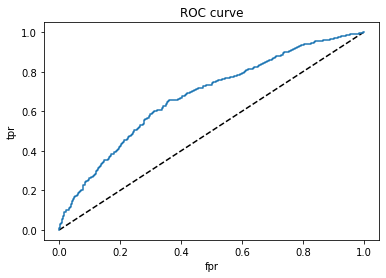

In [83]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [84]:
roc_auc_score(y_test, y_pred_proba)

0.6770422194151009

### for gridsearchcv model

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

# Final Model and Model Deployment

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

### for keras models

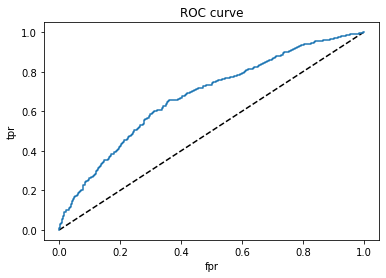

In [86]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.9867724867724867

### for gridsearchcv model

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.9894179894179893

## Saving Final Model and Scaler

In [88]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [89]:
model = Sequential()

model.add(Dense(44, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(22, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(11, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [90]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.5655 - recall: 0.0568 - val_loss: 0.4979 - val_recall: 0.0000e+00
Epoch 2/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.5327 - recall: 0.0000e+00 - val_loss: 0.4805 - val_recall: 0.0000e+00
Epoch 3/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.5098 - recall: 0.0000e+00 - val_loss: 0.4591 - val_recall: 0.0000e+00
Epoch 4/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.5024 - recall: 0.0000e+00 - val_loss: 0.4527 - val_recall: 0.0000e+00
Epoch 5/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4943 - recall: 0.0000e+00 - val_loss: 0.4507 - val_recall: 0.0000e+00
Epoch 6/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4920 - recall: 0.0000e+00 - val_loss: 0.4422 - val_recall: 0.0000e+00
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4812 - recall: 0.0000e+00 - val_loss: 

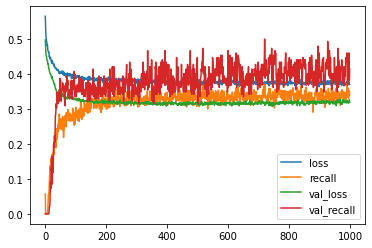

In [91]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [92]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.35169270634651184
accuracy :  0.4422604441642761


In [93]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1553   40]
 [ 227  180]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.82      0.44      0.57       407

    accuracy                           0.87      2000
   macro avg       0.85      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [94]:
model.save('model_churn.h5')

## Loading Model and Scaler

In [95]:
from tensorflow.keras.models import load_model

In [101]:
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))

## Prediction

In [123]:
pred_customer = df.drop('Exited', axis = 1).iloc[0:1, :]

In [124]:
pred_customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0,1,1,1,101348.88,0,0,0


In [125]:
pred_customer = scaler_churn.transform(pred_customer)
pred_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

In [126]:
(model_churn.predict(pred_customer) > 0.5).astype("int32")


array([[0]], dtype=int32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___